In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

In [2]:
data = []
with open("./network_data.log", 'r') as f:
    for line in f.readlines():
        data.append(json.loads(line))

In [3]:
traffic = pd.DataFrame(data)

In [4]:
traffic.sample(10)

,error,error_message,resp_str_length,response_code,response_ok,response_time,unixtime,url,url_index
83552,None,None,46010,200,True,0.130857,1508009228,http://www.apple.com,2
27893,None,None,170856,200,True,0.278606,1508009185,http://www.microsoft.com,3
78058,None,None,170528,200,True,0.333925,1508009209,http://www.microsoft.com,3
122256,None,None,219596,200,True,0.219096,1508009319,http://www.facebook.com,1
170425,None,None,10697,200,True,0.119545,1508009333,http://www.google.com,0
25732,None,None,46010,200,True,0.101775,1508009271,http://www.apple.com,2
100488,None,None,170964,200,True,0.289660,1508009377,http://www.microsoft.com,3
29088,None,None,170811,200,True,0.273095,1508009212,http://www.microsoft.com,3
103448,None,None,170911,200,True,0.407756,1508009367,http://www.microsoft.com,3
168595,None,None,10713,200,True,0.120718,1508009221,http://www.google.com,0


In [5]:
traffic.groupby(['url','url_index']).count()

,,error,error_message,resp_str_length,response_code,response_ok,response_time,unixtime
url,url_index,,,,,,,
http://mbusa.com,4,0,0,35511,35511,35511,35511,35511
http://www.apple.com,2,0,0,35511,35511,35511,35511,35511
http://www.facebook.com,1,0,0,35511,35511,35511,35511,35511
http://www.google.com,0,0,0,35511,35511,35511,35511,35511
http://www.microsoft.com,3,0,0,35511,35511,35511,35511,35511


<IPython.core.display.Javascript object>


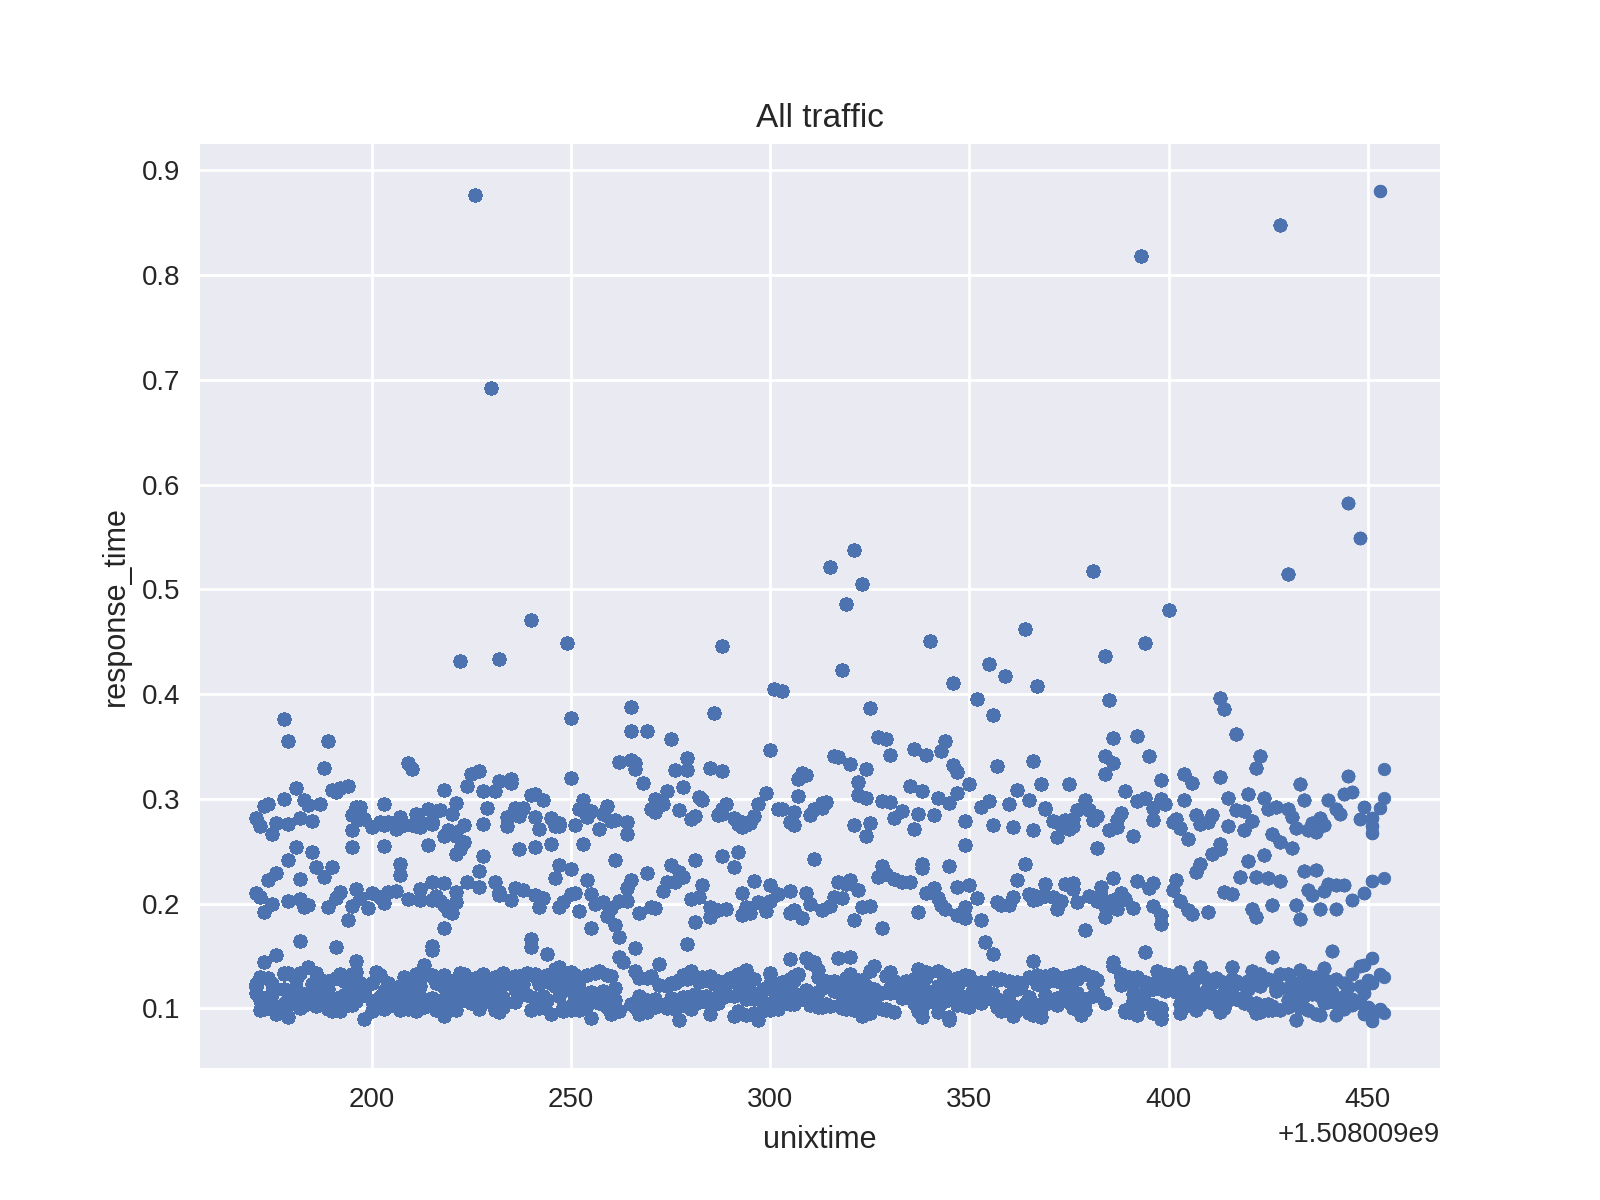

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
index = -1
if index < 0:
    plt.title('All traffic')
    traffic.plot(x='unixtime', y='response_time', ax=ax, kind='scatter')
else:
    plt.title(traffic[traffic['url_index'] == index]['url'].unique()[0])
    traffic[traffic['url_index']==index].plot(x='unixtime', y='response_time', ax=ax, kind='scatter')
# traffic.plot(x='unixtime', y='response_time', ax=ax, kind='scatter')

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(traffic.response_time, ax=ax, kde=False)

In [ ]:
traffic['response_code'].unique()

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
traffic.groupby(['error']).count()['url_index'].plot(kind='bar', ax=ax)
plt.tight_layout()